<a href="https://colab.research.google.com/github/vinothalagupandi/keras-tf/blob/master/classroom-practice/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/116.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' --header 'Sec-Fetch-Dest: document' --header 'Sec-Fetch-Mode: navigate' --header 'Sec-Fetch-Site: cross-site' --header 'Sec-Fetch-User: ?1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10338/862042/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1707672971&Signature=Y9M82nFK7KOEYvwG3M229IiD7K07YqETpjqOGrDh2MnJcJFCrGiYcDjOx9flDj8Wj72GBI4OqYMyadyn0FvR5kr5YVxe2k%2BONJyE5PkF%2B%2FtuttqaxPD4UxnomYtZL8xuyO6ve%2BiSVO5%2FB4l6HtoUz%2FKXSNbZ%2BRRJFgBHA4jfZe9oxf0VxvR6YtOdGLe3iHv9J%2FlsymZxeS4yGVLSajupcAHtHgo%2F%2B%2FnuPp1OSWMZhym%2BnqVUeJ1ait9DAwv4Fg4cnqUdrpsUuNmCitwaZe97wefu0KLiEoqyGFx3FcWPzyhsu4pl%2F55hZFD2GUMNXMfG%2BD6VOE3F4HvIccgUf1EkxA%3D%3D&response-content-disposition=attachment%3B+filename%3Drsna-pneumonia-detection-challenge.zip' --output-document 'rsna-pneumonia-detection-challenge.zip'

--2024-02-08 18:47:44--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10338/862042/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1707672971&Signature=Y9M82nFK7KOEYvwG3M229IiD7K07YqETpjqOGrDh2MnJcJFCrGiYcDjOx9flDj8Wj72GBI4OqYMyadyn0FvR5kr5YVxe2k%2BONJyE5PkF%2B%2FtuttqaxPD4UxnomYtZL8xuyO6ve%2BiSVO5%2FB4l6HtoUz%2FKXSNbZ%2BRRJFgBHA4jfZe9oxf0VxvR6YtOdGLe3iHv9J%2FlsymZxeS4yGVLSajupcAHtHgo%2F%2B%2FnuPp1OSWMZhym%2BnqVUeJ1ait9DAwv4Fg4cnqUdrpsUuNmCitwaZe97wefu0KLiEoqyGFx3FcWPzyhsu4pl%2F55hZFD2GUMNXMfG%2BD6VOE3F4HvIccgUf1EkxA%3D%3D&response-content-disposition=attachment%3B+filename%3Drsna-pneumonia-detection-challenge.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3932287530 (3.7G) [application/zip]
Saving to: ‘rsna-

In [ ]:
!unzip /content/rsna-pneumonia-detection-challenge.zip

# Chest X ray train test val data exploration

In [3]:

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/stage_2_train_labels.csv")

# Keep only the "patientId" and "Target" columns
df = df[["patientId", "Target"]]

# Print the DataFrame
print(df.head())


                              patientId  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd       0
2  00322d4d-1c29-4943-afc9-b6754be640eb       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5       0
4  00436515-870c-4b36-a041-de91049b9ab4       1


In [4]:

df = df.drop_duplicates()
df = df[df.notnull().all(axis=1)]
print(df.head())


                              patientId  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd       0
2  00322d4d-1c29-4943-afc9-b6754be640eb       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5       0
4  00436515-870c-4b36-a041-de91049b9ab4       1


In [5]:

import os

# Get the path to the train images directory
train_images_dir = "/content/stage_2_train_images"

# List the files in the directory
files = os.listdir(train_images_dir)

# Print the files
print(files[:10])


['5c5123a8-bbf2-449b-bb41-dde9c1bd5b5f.dcm', '89a40d1f-3e1f-4295-9a4c-4d5a13c5af70.dcm', 'fe455399-fd6f-4baa-8b02-cee57eb9986b.dcm', '92e14d7b-842b-4b05-bb5d-4aab98d9acfb.dcm', '3df8778b-822d-4cae-8f94-9fe156c601b7.dcm', 'e81046a7-87bc-43ef-858d-089ceb254bea.dcm', '6797dfe0-ba4e-464c-9644-8c1022b68a25.dcm', '4add9b3e-0e87-4875-902d-2f685166ce01.dcm', 'b697ecb0-3185-4ea6-a460-c5357b452e7a.dcm', '5ec1df7d-cbff-4d09-9ec0-45fb513e8015.dcm']


In [6]:
len(df),len(files)

(26684, 26684)

In [7]:
"0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm" in files

True

In [8]:
for ids in list(df["patientId"]):
  if f"{ids}.dcm" not in files:
    print(f"{id} is not heree")

In [9]:

from sklearn.model_selection import train_test_split

# Split the DataFrame into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
# Print the shapes of the train and validation DataFrames
print(f"Train DataFrame shape: {train_df.shape}")
print(f"Validation DataFrame shape: {val_df.shape}")


Train DataFrame shape: (21347, 2)
Validation DataFrame shape: (5337, 2)


In [10]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.5 MB/s eta 0:00:00


In [14]:
!pip install tensorflow_io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 13.7 MB/s eta 0:00:00


In [57]:

import tensorflow as tf
import pydicom
import tensorflow_io as tfio

def read_dicom_image(path,label):
    img_raw = tf.io.read_file(path)
    image = tfio.image.decode_dicom_image(img_raw, dtype=tf.uint16)
    image = tf.squeeze(image, axis=0)
    image = tf.image.resize(image, (180, 180))
    image = tf.cast(image, tf.float32) / 255.

    image = tf.image.grayscale_to_rgb(image,name=None)
    label = tf.reshape(label,[1])
    label = tf.cast(label,tf.float32)
    return image,label

def create_dataset(df, image_dir,batch_size):
    paths = [os.path.join(image_dir, f"{id}.dcm") for id in df["patientId"]]
    labels = list(df["Target"].values)
    paths=tf.constant(paths)
    labels = tf.constant(labels)
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(read_dicom_image)
    dataset = dataset.batch(batch_size, drop_remainder=True)

    return dataset
train_images_dir = "/content/stage_2_train_images"

train_dataset = create_dataset(train_df, train_images_dir,batch_size=32)
val_dataset = create_dataset(val_df, train_images_dir,batch_size=32)

In [40]:
for x,y in train_dataset:
  print(y.shape,x.shape)
  # print(x.shape,y.shape)
  # print(x.numpy(),y.numpy())
  break

(32, 1) (32, 224, 224, 3)


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Image shape: (32, 180, 180, 3)
Label: [0.]


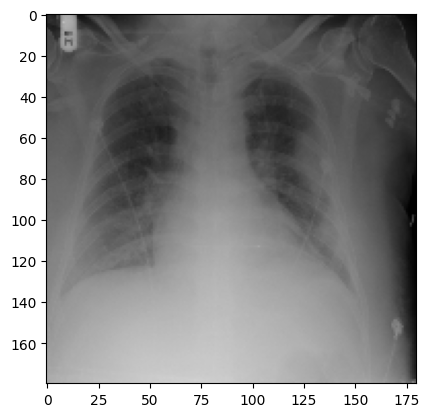

In [58]:

import matplotlib.pyplot as plt

# Get the first image and label from the train dataset
image, label = next(iter(train_dataset))

# Print the image shape and label
print(f"Image shape: {image.shape}")
print(f"Label: {label[0]}")

# Plot the image
plt.imshow(image[0])
plt.show()


In [59]:
from tensorflow import keras
from tensorflow.keras import layers


In [43]:

# from tensorflow.keras.applications import ResNet50
# # Load the ResNet50 model with pre-trained weights
# conv_base = ResNet50(weights="imagenet",include_top=False,input_shape=(224, 224, 3))
# conv_base.trainable = False
# # Print the model summary
# # conv_base.summary()


In [48]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [49]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [50]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 0


In [60]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [61]:
inputs= keras.Input(shape=(180,180, 3))
# x = keras.applications.resnet50.preprocess_input(inputs)
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)


In [62]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="rsna_vgg16.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=1,
    validation_data=val_dataset,
    callbacks=callbacks)